Ce notebook réunit les différents datasets utilisés dans les modèles d'estimation de la pose.

In [ ]:
# import des librairies nécessaires

import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as ptc
import scipy.io as sio
import pandas as pd

# COCO Keypoint Detection Task
Le dataset Microsoft COCO (Common Objects in Context) est composé de 200 000 images avec 250 000 personnes annotées dans des contextes variés avec 17 keypoints pour les ensembles de test, entraînement et validation. Le dataset date de 2020 mais depuis 2017 seule la séparation entraînement/validation a changé (et les annotations complètes). Seule la version 2017 est disponible au téléchargement. Dans cette version, certaines images ne sont pas annotées.

Les fichiers d'annotations sont des fichiers json.

Source : https://cocodataset.org/#download 

*Liste des keypoints :*

1. Nose
2. Left eye
3.	Right eye
4.	Left ear
5.	Right ear
6.	Left shoulder
7.	Right shoulder
8.	Left elbow
9.	Right elbow
10.	Left wrist
11.	Right wrist
12.	Left hip
13.	Right hip
14.	Left knee
15.	Right knee
16.	Left ankle
17.	Right ankle


## Chargement des données

In [ ]:
# téléchargement du fichier d'annotations de la base de validation et des images
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip

--2022-06-14 11:24:15--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.131.153
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.131.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  33.1MB/s    in 7.9s    

2022-06-14 11:24:23 (30.5 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2022-06-14 11:24:32--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.79.132
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.79.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  33.7MB/s    in 24s     

2022-06-14 11:24:56 (32.5 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [ ]:
# Chargement des données dans un dictionnaire
f = open('annotations/person_keypoints_val2017.json')
data = json.load(f)

# Affichage des clefs du dictionnaire
first_key = list(data.keys())[:]
print(first_key)

['info', 'licenses', 'images', 'annotations', 'categories']


Dans 'info' on trouve le lien et la version du dataset.

In [ ]:
print(data['info'])

{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}


Dans le dataset keypoints, il n’y a qu’une seule catégorie (person) qui contient les 17 keypoints ainsi que les liens entre eux pour constituer le squelette.

In [ ]:
print(data['categories'])

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'], 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]}]


'licenses' regroupe les différentes sources des images avec un id pour chaque source.

In [ ]:
for i in data['licenses']:
   print(i)

{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}
{'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}
{'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}
{'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}
{'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}
{'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}
{'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}
{'url': 'http://www.usa.gov/copyright.shtml', 'id': 8, 'name': 'United States Government Work'}


On affiche ici le premier élément de 'images'. Il s'agit du nom du fichier, de sa source (license et lien de téléchargement).
On y trouve également les dimensions de l'image (différentes pour toutes les images), sa date et enfin son id qui va nous permettre de la retrouver dans 'annotations'.

In [ ]:
for i in data['images']:
   print(i)
   break

{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}


## Affichage de l'image 448365

On va retrouver dans 'annotations' les caractéristiques de chaque image. On commence par rechercher toutes les annotations pour une image avec un id donné. Par exemple, 448365.

In [ ]:
l = []
for i in data.values():
    l.append(i)

In [ ]:
print(l[2][69]['id'])

448365


In [ ]:
n = len(l[3])
for i in range(0, n):
  if l[3][i]['image_id'] == l[2][69]['id'] :
    print(l[3][i])

{'segmentation': [[284.25, 35.31, 289.95, 36.94, 306.24, 63, 309.5, 67.89, 312.75, 72.78, 312.75, 77.66, 299.72, 87.44, 297.28, 90.69, 293.21, 93.14, 292.39, 93.95, 295.65, 101.28, 318.45, 115.94, 320.08, 115.13, 358.36, 116.75, 365.69, 111.87, 370.58, 115.13, 363.25, 128.97, 347.77, 129.78, 329.04, 133.86, 307.87, 133.86, 295.65, 125.71, 274.48, 136.3, 269.3, 168.98, 288.54, 219, 295.27, 231.5, 295.27, 236.31, 291.42, 257.47, 281.81, 275.74, 280.84, 280.55, 290.46, 298.83, 291.42, 300.75, 291.42, 304.6, 291.42, 309.4, 283.73, 311.33, 279.88, 312.29, 274.11, 315.18, 267.38, 314.21, 262.57, 331.53, 259.69, 338.26, 251.03, 339.22, 247.18, 331.53, 246.22, 318.06, 247.18, 302.67, 248.14, 271.89, 243.33, 266.12, 245.26, 261.32, 240.45, 251.7, 230.83, 226.69, 223.14, 225.73, 204.86, 219.96, 187.55, 207.45, 182.74, 185.33, 200.05, 132.43, 203.9, 111.27, 198.13, 93, 164.47, 117.05, 154.85, 118.01, 154.85, 111.27, 149.08, 107.43, 216.4, 65.11, 236.6, 71.84, 247.18, 60.3, 270.27, 34.33, 280.84, 

On obtient 1 ligne correspondant à cet id. Cela signifie qu'il y a 1 personne sur l'image.

- **segmentation** est un ensemble de coordonnées $(x,y)$ des points qui décrivent le contour de la personne
-	**num_keypoints** indique  le nombre de keypoints annotés
-	**area** est l’aire à l’intérieur de tous les points de segmentation
-	**iscrowd** est un booleen qui indique s’il y a plusieurs personnes
-	**keypoints** sont les coordonnées des keypoints avec la visibilité associée
-	**image_id** est le numéro d’image 
-	**bbox** est la bounding box. Les deux premières coordonnées sont celles du point en haut à gauche de la box suivi de la longueur et sa hauteur


In [ ]:
!unzip val2017.zip val2017/000000448365.jpg

Archive:  val2017.zip
 extracting: val2017/000000448365.jpg  


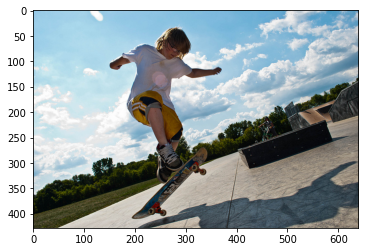

In [ ]:
# Affichage de l'image
img = mpimg.imread('val2017/000000448365.jpg')
imgplot = plt.imshow(img)
plt.show()

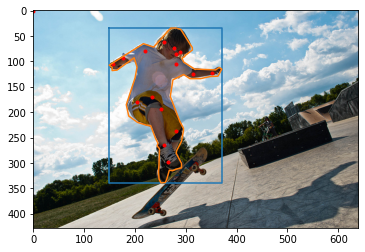

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('val2017/000000448365.jpg')
imgplot = plt.imshow(img)

n = len(l[3])
for i in range(0, n):
  if l[3][i]['image_id'] == l[2][69]['id'] :
    seg1 = np.array(l[3][i]['segmentation'])
    kpt = np.array(l[3][i]['keypoints'])
    bbox = np.array(l[3][i]['bbox'])

    n = len(kpt)
    kpt_x = np.zeros(n//3)
    kpt_y = np.zeros(n//3)
    kpt_v = np.zeros(n//3)
    for i in range(0, n, 3) :
      kpt_x[i//3] = kpt[i]
    for i in range (1, n, 3) :
      kpt_y[i//3] = kpt[i]
    for i in range(2,n , 3) :
      kpt_v[i//3] = kpt[i]

    bbox_x = np.array([ bbox[0], bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0] ])
    bbox_y = np.array([ bbox[1], bbox[1] + bbox[3], bbox[1] + bbox[3], bbox[1], bbox[1] ])

    strg = str(seg1[0])
    strg = strg.replace('[', '')
    strg = strg.replace(']', '')
    strg = strg.replace('\n', ' ')
    strg = strg.replace('   ', ' ')
    strg = strg.replace('  ', ' ')
    
    seg = strg.split(" ")
    n = len(seg)
    seg_x = np.zeros(n//2)
    seg_y = np.zeros(n//2)
    for i in range(0, n, 2) :
      seg_x[i//2] = float(seg[i])
    for i in range (1, n, 2) :
      seg_y[i//2] = float(seg[i])

    plt.scatter(kpt_x, kpt_y, marker = '.', color = 'red')
    plt.plot(bbox_x, bbox_y)
    plt.plot(seg_x, seg_y)

plt.show()

On peut voir que le seul point non visible (visibilité = 0) est l'oreille gauche, et il apparaît en $(0,0,0)$.

## Affichage de l'image 349860
Personne de face avec 2 keypoints cachés

In [ ]:
n = len(l[3])
for i in range(0, n):
  if l[3][i]['image_id'] == l[2][71]['id'] :
    print(l[3][i])

{'segmentation': [[342.16, 57.38, 323.01, 65.04, 305.78, 108.12, 299.08, 136.84, 285.68, 141.62, 279.93, 155.03, 290.47, 161.73, 299.08, 153.11, 307.7, 147.37, 312.48, 130.14, 317.27, 141.62, 313.44, 151.2, 342.16, 165.56, 351.73, 158.86, 354.6, 157.9, 347.9, 135.88, 340.24, 120.56, 345.99, 109.08, 363.22, 110.03, 384.28, 125.35, 409.17, 137.79, 432.15, 155.03, 418.74, 111.95, 434.06, 105.25, 456.08, 99.5, 465.65, 102.37, 462.78, 88.01, 457.99, 84.19, 449.38, 87.06, 421.62, 94.72, 409.17, 93.76, 383.32, 66, 370.88, 60.25, 374.71, 48.77, 375.67, 28.66, 374.71, 21, 361.31, 13.34, 347.9, 21, 345.99, 34.41, 345.99, 46.85, 345.99, 52.59]], 'num_keypoints': 17, 'area': 9747.7059, 'iscrowd': 0, 'keypoints': [363, 37, 2, 367, 31, 2, 357, 32, 2, 374, 37, 2, 348, 40, 2, 380, 71, 2, 330, 69, 2, 407, 98, 2, 317, 104, 2, 442, 95, 2, 304, 138, 2, 369, 147, 1, 333, 146, 2, 404, 102, 2, 360, 75, 2, 425, 173, 1, 369, 128, 1], 'image_id': 349860, 'bbox': [279.93, 13.34, 185.72, 152.22], 'category_id': 1

On a 3 boîtes de segmentation, donc 3 personnes.

In [ ]:
print(l[2][71]['id'])

349860


['342.16', '57.38', '323.01', '65.04', '305.78', '108.12', '299.08', '136.84', '285.68', '141.62', '279.93', '155.03', '290.47', '161.73', '299.08', '153.11', '307.7', '147.37', '312.48', '130.14', '317.27', '141.62', '313.44', '151.2', '342.16', '165.56', '351.73', '158.86', '354.6', '157.9', '347.9', '135.88', '340.24', '120.56', '345.99', '109.08', '363.22', '110.03', '384.28', '125.35', '409.17', '137.79', '432.15', '155.03', '418.74', '111.95', '434.06', '105.25', '456.08', '99.5', '465.65', '102.37', '462.78', '88.01', '457.99', '84.19', '449.38', '87.06', '421.62', '94.72', '409.17', '93.76', '383.32', '66.', '370.88', '60.25', '374.71', '48.77', '375.67', '28.66', '374.71', '21.', '361.31', '13.34', '347.9', '21.', '345.99', '34.41', '345.99', '46.85', '345.99', '52.59']
['48.82', '373.35', '57.44', '375.26', '61.27', '370.48', '61.27', '363.78', '64.14', '356.12', '62.22', '351.33', '53.61', '344.63', '48.82', '341.76', '46.91', '363.78', '49.78', '378.13']
['221.78', '325.4',

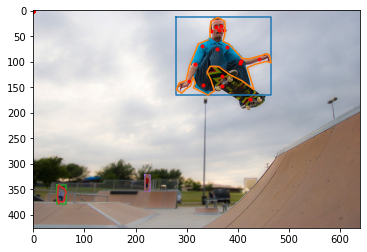

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('val2017/000000349860.jpg')
imgplot = plt.imshow(img)

n = len(l[3])
for i in range(0, n):
  if l[3][i]['image_id'] == l[2][71]['id'] :
    seg1 = np.zeros(len(l[3][i]['segmentation']))
    kpt = np.zeros(len(l[3][i]['keypoints']))
    bbox = np.zeros(len(l[3][i]['bbox']))

    seg1 = np.array(l[3][i]['segmentation'])
    kpt = np.array(l[3][i]['keypoints'])
    bbox = np.array(l[3][i]['bbox'])

    n = len(kpt)
    kpt_x = np.zeros(n//3)
    kpt_y = np.zeros(n//3)
    kpt_v = np.zeros(n//3)
    for i in range(0, n, 3) :
      kpt_x[i//3] = kpt[i]
    for i in range (1, n, 3) :
      kpt_y[i//3] = kpt[i]
    for i in range(2,n , 3) :
      kpt_v[i//3] = kpt[i]

    bbox_x = np.array([ bbox[0], bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0] ])
    bbox_y = np.array([ bbox[1], bbox[1] + bbox[3], bbox[1] + bbox[3], bbox[1], bbox[1] ])

    strg = ''
    strg = str(seg1[0])
    strg = strg.replace('[ ', '')
    strg = strg.replace(' ]', '')
    strg = strg.replace('[', '')
    strg = strg.replace(']', '')
    strg = strg.replace('\n', ' ')
    strg = strg.replace('    ', ' ')
    strg = strg.replace('   ', ' ')
    strg = strg.replace('  ', ' ')
    seg = strg.split(" ")
    n = len(seg)
    seg_x = np.zeros(n//2)
    seg_y = np.zeros(n//2)
    for i in range(0, n, 2) :
      seg_x[i//2] = float(seg[i])
    for i in range (1, n, 2) :
      seg_y[i//2] = float(seg[i])

    plt.scatter(kpt_x, kpt_y, marker = '.', color = 'red')
    plt.plot(bbox_x, bbox_y)
    plt.plot(seg_x, seg_y)

plt.show()

On voit ici des points avec une visibilité = 1, comme ceux des 2 pieds. Ils sont étiquetés mais non visibles.

# MPII Human Pose

Le dataset MPII Human Pose contient 25K images avec 40K personnes exerçant 410 activités différentes. Les personnes sont annotées de 16 keypoints.


Source : http://human-pose.mpi-inf.mpg.de/

*Liste des keypoints:*
0.	Right ankle
1.	Right knee
2.	Right hip
3.	Left hip
4.	Left knee
5.	Left ankle
6.	Pelvis
7.	Thorax
8.	Upper neck
9.	Head top
10.	Right wrist
11.	Right elbow
12.	Right shoulder
13.	Left shoulder
14.	Left elbow
15.	Left wrist

In [ ]:
!wget https://download.openmmlab.com/mmpose/datasets/mpii_annotations.tar

--2022-06-21 10:02:25--  https://download.openmmlab.com/mmpose/datasets/mpii_annotations.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.18
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77990912 (74M) [application/x-tar]
Saving to: ‘mpii_annotations.tar’

mpii_annotations.ta 100%[===================>]  74.38M  14.6MB/s    in 5.1s    

2022-06-21 10:02:32 (14.6 MB/s) - ‘mpii_annotations.tar’ saved [77990912/77990912]



In [ ]:
!tar -xf mpii_annotations.tar

In [ ]:
# Chargement des données
f = open('/content/valid.json')
data = json.load(f)

Dans le fichier d'annotations, on trouve :    
*   **joints_vis** : la visibilité des keypoints égale à 1 si le point est visible et 0 sinon
*   **joints** qui contient les coordonnnées de tous les keypoints
*   **image** avec le nom du fichier

In [ ]:
print(data[0])

{'joints_vis': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'joints': [[804.0, 711.0], [816.0, 510.0], [908.0, 438.0], [1040.0, 454.0], [906.0, 528.0], [883.0, 707.0], [974.0, 446.0], [985.0, 253.0], [982.7591, 235.9694], [962.2409, 80.0306], [869.0, 214.0], [798.0, 340.0], [902.0, 253.0], [1067.0, 253.0], [1167.0, 353.0], [1142.0, 478.0]], 'image': '005808361.jpg', 'scale': 4.718488, 'center': [966.0, 340.0]}


In [ ]:
print(len(data))

2958


In [ ]:
n = len(data)
for i in range(0, n) :
  if data[i]['image'] == '052475643.jpg' :
    print(data[i])
    print(i)

{'joints_vis': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'joints': [[317.0, 412.0], [318.0, 299.0], [290.0, 274.0], [353.0, 275.0], [403.0, 299.0], [394.0, 409.0], [322.0, 275.0], [327.0, 172.0], [329.9945, 162.1051], [347.0055, 105.8949], [296.0, 135.0], [281.0, 208.0], [296.0, 167.0], [358.0, 177.0], [387.0, 236.0], [392.0, 167.0]], 'image': '052475643.jpg', 'scale': 1.761835, 'center': [316.0, 220.0]}
1


In [ ]:
print(data[0]['joints_vis'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


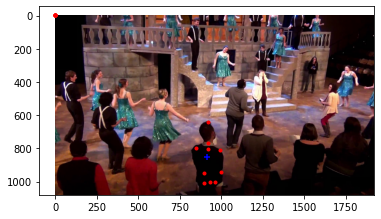

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('/content/090289500.jpg')
imgplot = plt.imshow(img)

kpt = np.array(data[221]['joints'])
center = np.array(data[221]['center'])

plt.scatter(kpt[:,0], kpt[:, 1], marker = '.', color = 'red')
plt.scatter(center[0], center[1], marker = '+', color = 'blue')

plt.show()

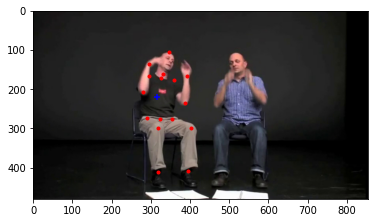

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('/content/052475643.jpg')
imgplot = plt.imshow(img)

kpt = np.array(data[1]['joints'])
center = np.array(data[1]['center'])

plt.scatter(kpt[:,0], kpt[:, 1], marker = '.', color = 'red')
plt.scatter(center[0], center[1], marker = '+', color = 'blue')

plt.show()

In [ ]:
print(len(data[1]['joints']))

16


# MPII TRB

Ce dataset est un modèle skeleton-based 2D avec 40 points pour représenter l’épaisseur des membres. Il est constitué des mêmes images que MPII avec les annotations supplémentaires. De même, il existe LSP_trb et COCO_trb.

Sources : https://github.com/kennymckormick/Triplet-Representation-of-human-Body

In [ ]:
!wget https://download.openmmlab.com/mmpose/datasets/mpii_trb_annotations.tar

--2022-06-21 10:42:03--  https://download.openmmlab.com/mmpose/datasets/mpii_trb_annotations.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25897984 (25M) [application/x-tar]
Saving to: ‘mpii_trb_annotations.tar’

mpii_trb_annotation 100%[===================>]  24.70M  7.83MB/s    in 3.2s    

2022-06-21 10:42:08 (7.83 MB/s) - ‘mpii_trb_annotations.tar’ saved [25897984/25897984]



In [ ]:
!tar -xf mpii_trb_annotations.tar

In [ ]:
# Chargement des données dans un dictionnaire
f = open('/content/mpii_trb_train.json')
data = json.load(f)

# Affichage des clefs du dictionnaire
first_key = list(data.keys())[:]
print(first_key)

['images', 'annotations', 'categories']


In [ ]:
df1 = pd.DataFrame(data['annotations'])

In [ ]:
df1.head()

,num_joints,keypoints,image_id,center,scale,category_id,id,iscrowd
0,40,"[1177.0, 293.0, 1.0, 1128.0, 287.0, 2.0, 1167....",53231026,"[1156.0, 376.0]",0.589160,1,0,0
1,39,"[677.0, 241.0, 2.0, 592.0, 245.0, 2.0, 683.0, ...",79639072,"[636.0, 344.0]",0.464481,1,1,0
2,40,"[656.0, 225.0, 2.0, 584.0, 232.0, 2.0, 722.0, ...",29403971,"[610.0, 310.0]",0.363905,1,2,0
3,38,"[482.0, 122.0, 2.0, 442.0, 124.0, 2.0, 492.0, ...",16673325,"[449.0, 166.0]",0.748952,1,3,0
4,40,"[1097.0, 384.0, 2.0, 869.0, 362.0, 2.0, 1117.0...",89588384,"[907.0, 540.0]",0.125838,1,4,0


In [ ]:
df1[df1["image_id"]==52475643]

,num_joints,keypoints,image_id,center,scale,category_id,id,iscrowd
25532,40,"[577.0, 173.0, 2.0, 479.0, 182.0, 2.0, 587.0, ...",52475643,"[499.0, 232.0]",0.395379,1,28439,0


In [ ]:
df1.image_id.value_counts(dropna=False)

90289500    16
82928680    15
18515169    13
16566317    13
98824716    13
            ..
50341727     1
77234098     1
68117255     1
28975960     1
35390583     1
Name: image_id, Length: 16160, dtype: int64

(array([1.0958e+04, 3.0630e+03, 1.0010e+03, 5.3300e+02, 2.7300e+02,
        1.6400e+02, 8.4000e+01, 3.7000e+01, 2.6000e+01, 1.0000e+01,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <a list of 16 Patch objects>)

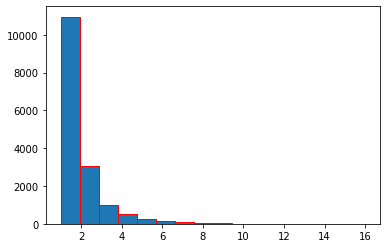

In [ ]:
plt.hist(df1.image_id.value_counts(dropna=False), edgecolor='red', bins = 16)

In [ ]:
df2 = pd.DataFrame(data['images'])

In [ ]:
df2.head()

,file_name,height,width,id
0,000001163.jpg,720,1280,1163
1,000003072.jpg,720,1280,3072
2,000004812.jpg,1080,1920,4812
3,000005283.jpg,1080,1920,5283
4,000013469.jpg,480,854,13469


In [ ]:
data['annotations'][0].keys()

dict_keys(['num_joints', 'keypoints', 'image_id', 'center', 'scale', 'category_id', 'id', 'iscrowd'])

In [ ]:
data['images'][0].keys()

dict_keys(['file_name', 'height', 'width', 'id'])

In [ ]:
data['categories'][0].keys()

dict_keys(['supercategory', 'id', 'name', 'keypoints'])

In [ ]:
print(len(data['annotations']))

25925


In [ ]:
for i in data['annotations'][13] :
  print(i, data['annotations'][13][i])

num_joints 40
keypoints [718.0, 225.0, 2.0, 554.0, 249.0, 2.0, 790.0, 347.0, 2.0, 571.0, 376.0, 2.0, 648.0, 376.0, 2.0, 653.0, 249.0, 2.0, 662.0, 475.0, 1.0, 576.0, 463.0, 2.0, 766.0, 513.0, 1.0, 612.0, 547.0, 2.0, 744.0, 687.0, 1.0, 646.0, 711.0, 2.0, 619.7964, 77.6642, 2.0, 634.2036, 219.3358, 2.0, 590, 189, 2, 678, 175, 2, 576, 274, 2, 525, 294, 2, 602, 397, 2, 571, 361, 2, 662, 242, 2, 633, 234, 2, 699, 245, 2, 757, 223, 2, 745, 335, 2, 778, 386, 2, 643, 357, 2, 638, 389, 2, 656, 530, 2, 529, 474, 2, 651, 578, 2, 567, 588, 2, 678, 708, 2, 620, 721, 2, 656, 530, 2, 727, 419, 2, 734, 558, 2, 790, 567, 2, 733, 712, 2, 780, 709, 2]
image_id 19371594
center [642.0, 332.0]
scale 0.19395785940000002
category_id 1
id 13
iscrowd 0


In [ ]:
print(data['images'][13])

{'file_name': '000033016.jpg', 'height': 720, 'width': 1280, 'id': 33016}


In [ ]:
l = []
for i in data.values():
    l.append(i)

In [ ]:
n = len(l[1])
for i in range(0, n):
 # print(l[1][i]['image_id'])
  if l[1][i]['image_id'] == l[0][13]['id'] :
    print(l[1][i])
    print(l[0][13]['id'])

{'num_joints': 40, 'keypoints': [672.0, 130.0, 2.0, 539.0, 128.0, 2.0, 764.0, 153.0, 2.0, 431.0, 150.0, 2.0, 707.0, 185.0, 2.0, 486.0, 167.0, 2.0, 636.0, 319.0, 2.0, 567.0, 316.0, 2.0, 654.0, 518.0, 2.0, 558.0, 502.0, 2.0, 665.0, 636.0, 2.0, 555.0, 640.0, 2.0, 601.0283, 9.6786, 2.0, 604.9717, 104.3214, 2.0, 576, 104, 2, 628, 101, 2, 532, 152, 2, 506, 114, 2, 490, 159, 2, 415, 159, 2, 515, 169, 2, 480, 178, 2, 677, 157, 2, 704, 119, 2, 721, 160, 2, 787, 170, 2, 688, 173, 2, 713, 191, 2, 599, 407, 2, 518, 362, 2, 579, 507, 2, 534, 501, 2, 569, 639, 2, 544, 633, 2, 599, 407, 2, 672, 364, 2, 634, 518, 2, 670, 503, 2, 652, 645, 2, 673, 638, 2], 'image_id': 33016, 'center': [578.0, 271.0], 'scale': 0.2915810256, 'category_id': 1, 'id': 5339, 'iscrowd': 0}
33016


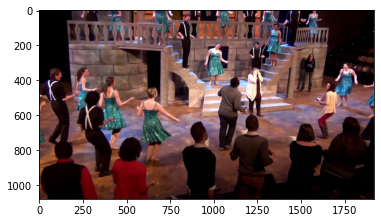

In [ ]:
# Affichage de l'image
img = mpimg.imread('/content/090289500.jpg')
imgplot = plt.imshow(img)
plt.show()

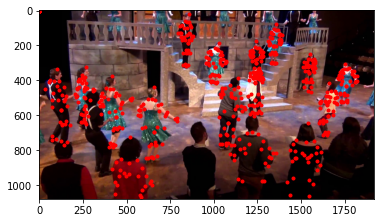

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('/content/090289500.jpg')
imgplot = plt.imshow(img)

df = df1[df1["image_id"]==90289500]
for i in df.index:
    kpt = df['keypoints'][i]

    m = len(kpt)
    kpt_x = np.zeros(m//3)
    kpt_y = np.zeros(m//3)
    kpt_v = np.zeros(m//3)
    for j in range(0, m, 3) :
      kpt_x[j//3] = kpt[j]
    for j in range (1, m, 3) :
      kpt_y[j//3] = kpt[j]
    for j in range(2, m, 3) :
      kpt_v[j//3] = kpt[j]

    plt.scatter(kpt_x, kpt_y, marker = '.', color = 'red')

plt.show()

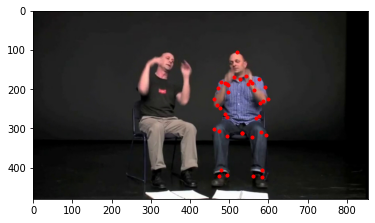

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('/content/052475643.jpg')
imgplot = plt.imshow(img)

df = df1[df1["image_id"]==52475643]
for i in df.index:
    kpt = df['keypoints'][i]

    m = len(kpt)
    kpt_x = np.zeros(m//3)
    kpt_y = np.zeros(m//3)
    kpt_v = np.zeros(m//3)
    for j in range(0, m, 3) :
      kpt_x[j//3] = kpt[j]
    for j in range (1, m, 3) :
      kpt_y[j//3] = kpt[j]
    for j in range(2, m, 3) :
      kpt_v[j//3] = kpt[j]

    plt.scatter(kpt_x, kpt_y, marker = '.', color = 'red')

plt.show()

# AI Challenger

AI Challenger contient 300k images avec 700k personnes. Les personnes sont décrites par 14 keypoints.

Source : https://arxiv.org/pdf/1711.06475.pdf

*Liste des keypoints :*
1.	Right shoulder
2.	Right elbow
3.	Right wrist
4.	Left shoulder
5.	Left elbow
6.	Left wrist
7.	Right hip
8.	Right knee
9.	Right ankle
10.	Left hip
11.	Left knee
12.	Left ankle
13.	Head top
14.	Neck


In [ ]:
!wget https://download.openmmlab.com/mmpose/datasets/aic_annotations.tar

--2022-06-20 12:59:19--  https://download.openmmlab.com/mmpose/datasets/aic_annotations.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608705024 (581M) [application/x-tar]
Saving to: ‘aic_annotations.tar’

aic_annotations.tar 100%[===================>] 580.51M  10.8MB/s    in 58s     

2022-06-20 13:00:18 (10.0 MB/s) - ‘aic_annotations.tar’ saved [608705024/608705024]



In [ ]:
!tar -xf aic_annotations.tar

In [ ]:
# Chargement des données dans un dictionnaire
f = open('/content/aic_train.json')
data = json.load(f)

# Affichage des clefs du dictionnaire
first_key = list(data.keys())[:]
print(first_key)

['info', 'licenses', 'categories', 'images', 'annotations']


In [ ]:
print(data['categories'])

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['Right Shoulder', 'Right Elbow', 'Right Wrist', 'Left Shoulder', 'Left Elbow', 'Left Wrist', 'Right Hip', 'Right Knee', 'Right Ankle', 'Left Hip', 'Left Knee', 'Left Ankle', 'Head top', 'Neck'], 'skeleton': [[3, 2], [2, 1], [1, 14], [14, 4], [4, 5], [5, 6], [9, 8], [8, 7], [7, 10], [10, 11], [11, 12], [13, 14], [1, 7], [4, 10]]}]


In [ ]:
print(len(data['images']))

210000


In [ ]:
print(data['images'][0])

{'url': 'http://news.sogou.com/', 'file_name': 'c681fcce2fab08692d11100fd8195353cf27a631.jpg', 'height': 729, 'width': 750, 'id': 0}


In [ ]:
print(data['annotations'][0])

{'bbox': [333, 98, 178, 569], 'keypoints': [469, 181, 2, 499, 290, 2, 493, 342, 2, 373, 178, 2, 356, 280, 2, 361, 309, 2, 462, 378, 2, 468, 506, 2, 481, 622, 2, 400, 382, 2, 397, 507, 2, 394, 621, 2, 368, 115, 2, 402, 156, 2], 'num_keypoints': 14, 'image_id': 0, 'scores': [], 'category_id': 1, 'id': 1, 'iscrowd': 0, 'area': 101282}


In [ ]:
l = []
for i in data.values():
    l.append(i)

In [ ]:
n = len(l[4])
for i in range(0, n):
  if l[4][i]['image_id'] == l[3][350]['id'] :
    print(l[4][i])

{'bbox': [125, 259, 364, 491], 'keypoints': [271, 445, 2, 265, 612, 2, 253, 707, 2, 381, 429, 2, 402, 611, 2, 326, 715, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 321, 274, 2, 319, 401, 2], 'num_keypoints': 8, 'image_id': 350, 'scores': [], 'category_id': 1, 'id': 436, 'iscrowd': 0, 'area': 178724}
{'bbox': [18, 223, 205, 527], 'keypoints': [56, 394, 2, 71, 568, 2, 138, 667, 2, 166, 367, 2, 208, 493, 2, 211, 637, 1, 106, 696, 1, 0, 0, 0, 0, 0, 0, 172, 681, 1, 0, 0, 0, 0, 0, 0, 128, 231, 2, 124, 356, 2], 'num_keypoints': 10, 'image_id': 350, 'scores': [], 'category_id': 1, 'id': 437, 'iscrowd': 0, 'area': 108035}


# Penn Action Dataset

Ce dataset contient 2326 vidéos de 15 actions différentes (bowling, squat, service de tennis…). Les personnes sont annotées de 13 keypoints.

Source : http://dreamdragon.github.io/PennAction/

*Liste des keypoints :*
1.	Head
2.	Left shoulder
3.	Right shoulder
4.	Left elbow
5.	Right elbow
6.	Left wrist
7.	Right wrist
8.	Left hip
9.	Right hip
10.	Left knee
11.	Right knee
12.	Left ankle
13.	Right ankle

In [ ]:
!wget https://www.cis.upenn.edu/~kostas/Penn_Action.tar.gz

--2022-06-15 13:30:15--  https://www.cis.upenn.edu/~kostas/Penn_Action.tar.gz
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3235203923 (3.0G) [application/x-gzip]
Saving to: ‘Penn_Action.tar.gz’

Penn_Action.tar.gz  100%[===================>]   3.01G  41.9MB/s    in 77s     

2022-06-15 13:31:32 (40.0 MB/s) - ‘Penn_Action.tar.gz’ saved [3235203923/3235203923]



In [ ]:
!tar -xf Penn_Action.tar.gz Penn_Action/labels

In [ ]:
!tar -xf Penn_Action.tar.gz Penn_Action/frames/0003/000001.jpg

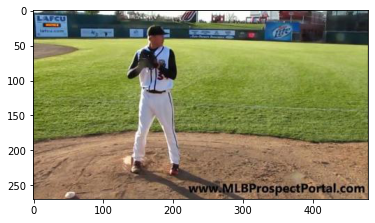

In [ ]:
# Affichage de la première image de la 3ème vidéo
img = mpimg.imread('/content/Penn_Action/frames/0003/000001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Chargement des données de la vidéo 3 dans un dictionnaire
mat = sio.loadmat('/content/Penn_Action/labels/0003.mat')

# Affichage des clefs
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'action', 'pose', 'x', 'y', 'visibility', 'train', 'bbox', 'dimensions', 'nframes'])

Une vidéo est décrite par un fichier .mat qui contient les informations suivantes :



*   La date, la version dans __header__ et __version__
*   L'action représentée dans la vidéo (parmi les 15 représentées dans le dataset) dans __action__
*   L'angle selon lequel on voit l'action dans __pose__. Il y en a 4 possibles : right, left, front, back.
*   __nframes__ est le nombre de frames de la vidéo
*   __dimensions__ contient la hauteur, la largeur de l'image et le nombre de frames
*   __bbox__ est la bounding box de la personne pour chaque frame. Elle est décrite par les coordonnées $(x,y)$ du coin supérieur gauche et du coin inférieur droit, qui dessinent un rectangle.
*   __train__ est une variable égale à 1 si la vidéo est dans la base d'entraînement et -1 sinon
*   __visibility__ est égale à 1 si le point est visible, 0 sinon
*   __x__ et __y__ sont les coordonnées de tous les keypoints à chaque frame



In [ ]:
print(mat['bbox'][0])

[134.66666667  20.         208.66666667 237.33333333]


In [ ]:
bbox_x = np.array([mat['bbox'][0,0],
                mat['bbox'][0,2],
                mat['bbox'][0,2],
                mat['bbox'][0,0],
                mat['bbox'][0,0]])
bbox_y = np.array([mat['bbox'][0,1], 
                mat['bbox'][0,1],
                mat['bbox'][0,3],
                mat['bbox'][0,3],
                mat['bbox'][0,1]])

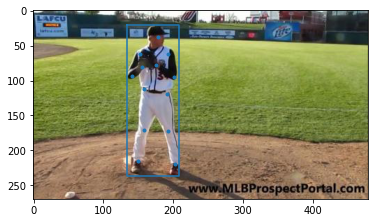

In [ ]:
img = mpimg.imread('/content/Penn_Action/frames/0003/000001.jpg')
imgplot = plt.imshow(img)
plt.plot(bbox_x, bbox_y)
plt.scatter(mat['x'][0], mat['y'][0], marker = '.')
plt.show()

# Leeds Sports Pose (LSP)

Ce dataset est composé de 2000 images représentant 8 sports avec 14 keypoints par personne. Chaque image fait environ 150 pixels de haut.
Les bases d’entraînement et de test sont divisées de moitié.
Il existe une version étendue du dataset avec 10 000 images et 3 sports.

Source : http://sam.johnson.io/research/lsp.html

Le dataset contient les images ainsi qu’un fichier joints.mat avec une matrice contenant pour chaque image les 14 keypoints avec leurs coordonnées $(x,y)$ et leur visibilité.

*Liste des keypoints :*
1.	Right ankle
2.	Right knee
3.	Right hip
4.	Left hip
5.	Left knee
6.	Left ankle
7.	Right wrist
8.	Right elbow
9.	Right shoulder
10.	Left shoulder
11.	Left elbow
12.	Left wrist
13.	Neck
14.	Head top

In [ ]:
!wget http://sam.johnson.io/research/lsp_dataset.zip

--2022-06-15 14:38:47--  http://sam.johnson.io/research/lsp_dataset.zip
Resolving sam.johnson.io (sam.johnson.io)... 40.70.30.232
Connecting to sam.johnson.io (sam.johnson.io)|40.70.30.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35416832 (34M) [application/zip]
Saving to: ‘lsp_dataset.zip’

lsp_dataset.zip     100%[===================>]  33.78M  21.2MB/s    in 1.6s    

2022-06-15 14:38:49 (21.2 MB/s) - ‘lsp_dataset.zip’ saved [35416832/35416832]



In [ ]:
!unzip lsp_dataset.zip

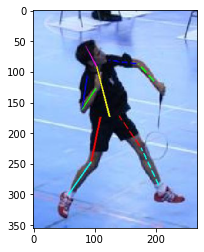

In [ ]:
# On charge ici une image où les keypoints sont déjà notés et tous visibles
img = mpimg.imread('visualized/im0051.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
mat = sio.loadmat('/content/joints.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'joints'])

In [ ]:
X = mat['joints']
print(X[:,:,50])

[[ 33.64856594  54.24899114  62.62882511  80.08681257 100.33807802
  117.44690573  58.43890813  45.86915716  50.4082339   70.3103396
   97.89395978 113.95530823  59.13722762  49.0115949 ]
 [170.64961103 140.97103236  99.42102221  98.02438322 127.70296189
  164.0155758   72.88488128  91.73950773  61.36260956  46.6979001
   50.18949759  68.34580454  51.93529633  33.42982963]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]]


Dans LSP, la valeur de la visibilité a un sens inversé : elle est égale à 0 quand le point est visible et 1 sinon. La partie gauche du corps et reliée en points tillés et la droite en traits pleins.

# CrowdPose

CrowdPose est particulièrement adapté aux images de foule. Il est composé de 20 000 avec 80 000 poses et 14 keypoints. Les images sont extraites d’autres datasets, notamment COCO, MPII et AI Challenger.

Source : https://github.com/Jeff-sjtu/CrowdPose

In [ ]:
f = open('/content/drive/MyDrive/Colab Notebooks/Pose estimation/Datasets/crowdpose_val.json')

In [ ]:
data = json.load(f)
first_key = list(data.keys())[:]
print(first_key)

['info', 'categories', 'images', 'annotations']


In [ ]:
print(data['categories'])

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'head', 'neck'], 'skeleton': [[12, 13], [13, 0], [13, 1], [0, 2], [2, 4], [1, 3], [3, 5], [13, 7], [13, 6], [7, 9], [9, 11], [6, 8], [8, 10]]}]


In [ ]:
print(data['images'][0])

{'file_name': '114203.jpg', 'id': 114203, 'height': 1000, 'width': 795, 'crowdIndex': 0.76}


__crowdindex__ est un niveau de "remplissage" de la photo entre 0 et 1 qui suit une distribution uniforme sur le dataset. Plus il est proche de 1, plus il y a de personnes. \\
On a également les dimensions de l'image (__height__ et __width__), son nom et son id.

In [ ]:
print(data['annotations'][0])

{'num_keypoints': 12, 'iscrowd': 0, 'keypoints': [739, 301, 1, 569, 287, 1, 730, 361, 1, 503, 340, 1, 699, 276, 1, 413, 371, 1, 672, 553, 1, 583, 519, 1, 666, 714, 1, 508, 513, 1, 675, 908, 1, 400, 595, 1, 617, 192, 1, 651, 283, 1], 'image_id': 114203, 'bbox': [290, 166, 482, 791], 'category_id': 1, 'id': 165388}


Les annotations se composent notamment de :
*   __keypoints__ qui donnent les coordonnées $(x,y,v)$ avec la visibilité à 1 si le point est visible, 0 sinon
*   __bbox__ qui donne les coordonnées du coin supérieur gauche de la bounding box ainsi que sa hauteur et sa largeur

In [ ]:
l = []
for i in data.values():
    l.append(i)

In [ ]:
n = len(l[3])
for i in range(0, n):
  if l[2][0]['id'] == l[3][i]['image_id'] :
    print(l[3][i])

{'num_keypoints': 12, 'iscrowd': 0, 'keypoints': [739, 301, 1, 569, 287, 1, 730, 361, 1, 503, 340, 1, 699, 276, 1, 413, 371, 1, 672, 553, 1, 583, 519, 1, 666, 714, 1, 508, 513, 1, 675, 908, 1, 400, 595, 1, 617, 192, 1, 651, 283, 1], 'image_id': 114203, 'bbox': [290, 166, 482, 791], 'category_id': 1, 'id': 165388}
{'num_keypoints': 12, 'iscrowd': 0, 'keypoints': [353, 257, 1, 171, 296, 1, 447, 360, 1, 93, 367, 1, 457, 466, 1, 63, 379, 1, 375, 525, 1, 258, 570, 1, 492, 644, 1, 230, 759, 1, 519, 803, 1, 236, 907, 1, 260, 112, 1, 253, 242, 1], 'image_id': 114203, 'bbox': [7, 89, 608, 858], 'category_id': 1, 'id': 181177}
{'num_keypoints': 12, 'iscrowd': 0, 'keypoints': [295, 318, 1, 156, 318, 1, 289, 421, 1, 114, 421, 1, 338, 487, 1, 81, 504, 1, 260, 537, 1, 176, 536, 1, 245, 678, 1, 173, 673, 1, 228, 808, 1, 185, 798, 1, 138, 281, 1, 239, 261, 1], 'image_id': 114203, 'bbox': [54, 195, 184, 675], 'category_id': 1, 'id': 183967}


Pour cette image, on a 3 annotations, donc on a 3 personnes.

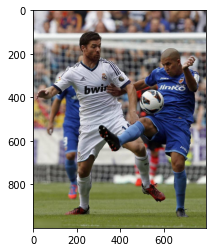

In [ ]:
# Affichage de l'image
img = mpimg.imread('/content/114203.jpg')
imgplot = plt.imshow(img)
plt.show()

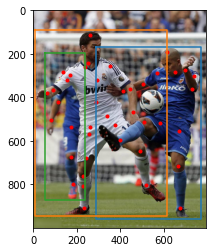

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('/content/114203.jpg')
imgplot = plt.imshow(img)

n = len(l[3])
for i in range(0, n):
  if l[2][0]['id'] == l[3][i]['image_id'] :
    kpt = np.array(l[3][i]['keypoints'])
    bbox = np.array(l[3][i]['bbox'])

    n = len(kpt)
    kpt_x = np.zeros(n//3)
    kpt_y = np.zeros(n//3)
    kpt_v = np.zeros(n//3)
    for i in range(0, n, 3) :
      kpt_x[i//3] = kpt[i]
    for i in range (1, n, 3) :
      kpt_y[i//3] = kpt[i]
    for i in range(2,n , 3) :
      kpt_v[i//3] = kpt[i]

    bbox_x = np.array([ bbox[0], bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0] ])
    bbox_y = np.array([ bbox[1], bbox[1] + bbox[3], bbox[1] + bbox[3], bbox[1], bbox[1] ])

    plt.scatter(kpt_x, kpt_y, marker = '.', color = 'red')
    plt.plot(bbox_x, bbox_y)

plt.show()

# OC Human

Ce dataset contient 4731 images avec 8110 personnes dans des situations complexes d’occlusion visuelle (une personne en cachant une autre lors d’une action sportive par exemple).

D’après Zhang et al, il est recommandé d’utiliser ce dataset en validation et test uniquement et d’entraîner le modèle sur un dataset tel que COCO pour tester sa robustesse aux situations d’occlusion.

Sources : https://arxiv.org/pdf/1803.10683.pdf

https://github.com/liruilong940607/OCHumanApi

In [ ]:
f = open('/content/drive/MyDrive/Colab Notebooks/Pose estimation/OCHuman/ochuman.json')

In [ ]:
data = json.load(f)
print(data.keys())

dict_keys(['images', 'keypoint_names', 'keypoint_visible'])


In [ ]:
print(data['keypoint_names'])

['right_shoulder', 'right_elbow', 'right_wrist', 'left_shoulder', 'left_elbow', 'left_wrist', 'right_hip', 'right_knee', 'right_ankle', 'left_hip', 'left_knee', 'left_ankle', 'head', 'neck', 'right_ear', 'left_ear', 'nose', 'right_eye', 'left_eye']


In [ ]:
print(data['keypoint_visible'])

{'vis': 1, 'others_occluded': 3, 'self_occluded': 2, 'missing': 0}


La __visibilité__ est donc définie ainsi :

* 0 si le keypoint est inexistant
* 1 si le keypoint est visible
* 2 si le keypoint est caché par la personne
* 3 si le keypoint est caché par autre chose

In [ ]:
for i in data['images'][0] :
  print(i, data['images'][0][i])

annotations [{'max_iou': 0.6027624011039734, 'keypoints': [302, 285, 1, 343, 390, 1, 431, 363, 1, 478, 258, 1, 577, 287, 3, 661, 282, 1, 352, 477, 1, 335, 643, 1, 307, 810, 1, 430, 486, 3, 416, 662, 1, 329, 785, 1, 353, 141, 1, 376, 244, 1, 328.49723669132726, 196.90978452976526, 1, 397.6046906555844, 184.91480238212299, 1, 371.5701271305881, 188.86769422623237, 1, 353.4413472938106, 177.5542451551607, 1, 380.9752835872622, 174.5554996182501, 1], 'segms': {'outer': [[622.1113669622191, 268.7140063205055, 635.2836803099337, 270.26369024376606, 652.3302034657997, 270.26369024376606, 662.4031489669933, 268.7140063205055, 677.1251462379686, 265.6146384739844, 691.0723015473135, 263.2901125890936, 698.8207211636163, 265.6146384739844, 703.469772933398, 273.36305809028715, 707.3439827415493, 272.5882161286569, 713.5427184345915, 273.36305809028715, 718.9666121660034, 280.3366357449596, 720.516296089264, 285.7605294763715, 718.9666121660034, 285.7605294763715, 715.092402357852, 289.6347392845

In [ ]:
for i in data['images'][0]['annotations'] :
  print(i)

{'max_iou': 0.6027624011039734, 'keypoints': [302, 285, 1, 343, 390, 1, 431, 363, 1, 478, 258, 1, 577, 287, 3, 661, 282, 1, 352, 477, 1, 335, 643, 1, 307, 810, 1, 430, 486, 3, 416, 662, 1, 329, 785, 1, 353, 141, 1, 376, 244, 1, 328.49723669132726, 196.90978452976526, 1, 397.6046906555844, 184.91480238212299, 1, 371.5701271305881, 188.86769422623237, 1, 353.4413472938106, 177.5542451551607, 1, 380.9752835872622, 174.5554996182501, 1], 'segms': {'outer': [[622.1113669622191, 268.7140063205055, 635.2836803099337, 270.26369024376606, 652.3302034657997, 270.26369024376606, 662.4031489669933, 268.7140063205055, 677.1251462379686, 265.6146384739844, 691.0723015473135, 263.2901125890936, 698.8207211636163, 265.6146384739844, 703.469772933398, 273.36305809028715, 707.3439827415493, 272.5882161286569, 713.5427184345915, 273.36305809028715, 718.9666121660034, 280.3366357449596, 720.516296089264, 285.7605294763715, 718.9666121660034, 285.7605294763715, 715.092402357852, 289.6347392845229, 710.4433

In [ ]:
print(data['images'][0]['annotations'][0]['keypoints'])

[302, 285, 1, 343, 390, 1, 431, 363, 1, 478, 258, 1, 577, 287, 3, 661, 282, 1, 352, 477, 1, 335, 643, 1, 307, 810, 1, 430, 486, 3, 416, 662, 1, 329, 785, 1, 353, 141, 1, 376, 244, 1, 328.49723669132726, 196.90978452976526, 1, 397.6046906555844, 184.91480238212299, 1, 371.5701271305881, 188.86769422623237, 1, 353.4413472938106, 177.5542451551607, 1, 380.9752835872622, 174.5554996182501, 1]


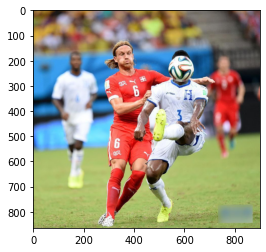

In [ ]:
# Affichage de l'image
img = mpimg.imread('/content/003799.jpg')
imgplot = plt.imshow(img)
plt.show()

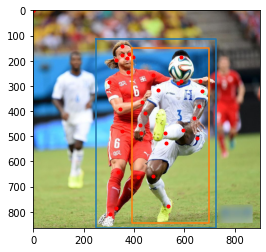

In [ ]:
# Affichage de l'image avec ses keypoints
img = mpimg.imread('/content/003799.jpg')
imgplot = plt.imshow(img)

n = len(data['images'][0]['annotations']) # ici 0 correspond à la première image du dataset
for i in range(0, n):
    kpt = np.array(data['images'][0]['annotations'][i]['keypoints'])
    bbox = np.array(data['images'][0]['annotations'][i]['bbox'])

    m = len(kpt)
    kpt_x = np.zeros(m//3)
    kpt_y = np.zeros(m//3)
    kpt_v = np.zeros(m//3)
    for j in range(0, m, 3) :
      kpt_x[j//3] = kpt[j]
    for j in range (1, m, 3) :
      kpt_y[j//3] = kpt[j]
    for j in range(2, m, 3) :
      kpt_v[j//3] = kpt[j]

    bbox_x = np.array([ bbox[0], bbox[0], bbox[2], bbox[2], bbox[0] ])
    bbox_y = np.array([ bbox[1], bbox[3], bbox[3], bbox[1], bbox[1] ])

    plt.scatter(kpt_x, kpt_y, marker = '.', color = 'red')
    plt.plot(bbox_x, bbox_y)

plt.show()

# PoseTrack

Ce dataset est composé de 1356 vidéos divisées en 46 000 frames. Le squelette est composé de 17 keypoints.

Source : https://posetrack.net/ 

In [ ]:
!wget --no-check-certificate https://posetrack.net/posetrack18-data/posetrack18_v0.45_public_labels.tar.gz

--2022-06-17 08:16:28--  https://posetrack.net/posetrack18-data/posetrack18_v0.45_public_labels.tar.gz
Resolving posetrack.net (posetrack.net)... 139.19.217.20
Connecting to posetrack.net (posetrack.net)|139.19.217.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://datasets.d2.mpi-inf.mpg.de/posetrack2/public/posetrack18_v0.45_public_labels.tar.gz [following]
--2022-06-17 08:16:30--  http://datasets.d2.mpi-inf.mpg.de/posetrack2/public/posetrack18_v0.45_public_labels.tar.gz
Resolving datasets.d2.mpi-inf.mpg.de (datasets.d2.mpi-inf.mpg.de)... 139.19.206.177
Connecting to datasets.d2.mpi-inf.mpg.de (datasets.d2.mpi-inf.mpg.de)|139.19.206.177|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://datasets.d2.mpi-inf.mpg.de/posetrack2/public/posetrack18_v0.45_public_labels.tar.gz [following]
--2022-06-17 08:16:32--  https://datasets.d2.mpi-inf.mpg.de/posetrack2/public/posetrack18_v0.45_public_labels.tar.gz
Conn

In [ ]:
!tar -xf posetrack18_v0.45_public_labels.tar.gz

In [ ]:
f = open('/content/posetrack_data/annotations/val/000342_mpii_test.json')

In [ ]:
data = json.load(f)
first_key = list(data.keys())[:]
print(first_key)

['images', 'annotations', 'categories']


In [ ]:
print(data['categories'])

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['nose', 'head_bottom', 'head_top', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'], 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]}]


In [ ]:
print(data['images'][0])

{'has_no_densepose': True, 'is_labeled': True, 'file_name': 'images/val/000342_mpii_test/000000.jpg', 'nframes': 100, 'frame_id': 10003420000, 'vid_id': '000342', 'id': 10003420000}


In [ ]:
print(data['annotations'][0])

{'bbox_head': [625, 94, 56, 84], 'keypoints': [659, 152, 1, 616.4887695, 153.2525482, 1, 680.3834229, 123.060585, 1, 0, 0, 0, 0, 0, 0, 618, 140, 1, 597, 175, 1, 666, 185, 1, 604, 232, 1, 710, 228, 1, 664, 242, 1, 539, 184, 1, 523, 204, 1, 430, 204, 1, 386, 229, 1, 381, 164, 1, 394, 173, 1], 'track_id': 0, 'image_id': 10003420000, 'bbox': [331.65, 105.21967275, 427.70000000000005, 154.62123949999997], 'scores': [], 'category_id': 1, 'id': 1000342000000}


In [ ]:
l = []
for i in data.values():
    l.append(i)

In [ ]:
n = len(l[1])
for i in range(0, n):
  if l[0][0]['frame_id'] == l[1][i]['image_id'] :
    print(l[1][i])

{'bbox_head': [625, 94, 56, 84], 'keypoints': [659, 152, 1, 616.4887695, 153.2525482, 1, 680.3834229, 123.060585, 1, 0, 0, 0, 0, 0, 0, 618, 140, 1, 597, 175, 1, 666, 185, 1, 604, 232, 1, 710, 228, 1, 664, 242, 1, 539, 184, 1, 523, 204, 1, 430, 204, 1, 386, 229, 1, 381, 164, 1, 394, 173, 1], 'track_id': 0, 'image_id': 10003420000, 'bbox': [331.65, 105.21967275, 427.70000000000005, 154.62123949999997], 'scores': [], 'category_id': 1, 'id': 1000342000000}
{'bbox_head': [664, 140, 81, 113], 'keypoints': [715, 236.5, 1, 650.3543091, 209.1903992, 1, 745.1092529, 186.9822083, 1, 0, 0, 0, 0, 0, 0, 645, 195.5, 1, 636, 227.5, 1, 688, 271.5, 1, 596, 318.5, 1, 733, 296.5, 1, 676, 332.5, 1, 512, 225, 1, 499, 257, 1, 397, 252.5, 1, 361, 281.5, 1, 300, 247.5, 1, 251, 273.5, 1], 'track_id': 1, 'image_id': 10003420000, 'bbox': [176.88361206499997, 165.154539545, 642.3420287700001, 189.17312920999998], 'scores': [], 'category_id': 1, 'id': 1000342000001}


# DriPE

DriPE est un dataset construit sur le modèle de COCO contenant 10 000 photos de conduite. Ce sont des personnes au volant avec une luminosité variante et certaines parties de leur corps non visibles. Une personne est décrite par 17 keypoints également (les mêmes que COCO).

Ce dataset introduit une nouvelle métrique en plus : mAPK qui va permettre de juger la précision des points sur les parties non visibles. 

Source : https://gitlab.liris.cnrs.fr/aura_autobehave/dripe/-/tree/master/

In [ ]:
!wget https://gitlab.liris.cnrs.fr/aura_autobehave/dripe/-/blob/master/json/gts/autob_coco_test.json

--2022-06-17 08:59:40--  https://gitlab.liris.cnrs.fr/aura_autobehave/dripe/-/blob/master/json/gts/autob_coco_test.json
Resolving gitlab.liris.cnrs.fr (gitlab.liris.cnrs.fr)... 134.214.142.170
Connecting to gitlab.liris.cnrs.fr (gitlab.liris.cnrs.fr)|134.214.142.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘autob_coco_test.json’

autob_coco_test.jso     [   <=>              ]  77.50K   161KB/s    in 0.5s    

2022-06-17 08:59:43 (161 KB/s) - ‘autob_coco_test.json’ saved [79364]



In [ ]:
f = open('/content/drive/MyDrive/Colab Notebooks/Pose estimation/Datasets/autob_coco_test.json')

In [ ]:
data = json.load(f)
first_key = list(data.keys())[:]
print(first_key)

['images', 'annotations', 'categories']


In [ ]:
print(data['categories'])

[{'supercategory': 'person', 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]], 'id': 1, 'name': 'person', 'keypoints': ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']}]


In [ ]:
print(data['images'][1])

{'license': 0, 'file_name': 'Transpolis-E-AMBA0013MOV_1180_brightdif.png', 'coco_url': '', 'height': 480, 'width': 1137, 'date_captured': '', 'flickr_url': '', 'id': 20501311800}


In [ ]:
print(data['annotations'][1])

{'segmentation': [[88, 3, 794, 3, 794, 420, 88, 420]], 'num_keypoints': 9, 'area': 294402.0, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 235, 132, 2, 314, 93, 1, 460, 271, 2, 485, 77, 2, 540, 58, 2, 381, 218, 1, 388, 341, 2, 578, 73, 1, 707, 224, 2, 0, 0, 0, 0, 0, 0], 'image_id': 20501311800, 'bbox': [88, 3, 706, 417], 'category_id': 1, 'id': 20501311800}


In [ ]:
l = []
for i in data.values():
    l.append(i)

In [ ]:
n = len(l[1])
for i in range(0, n):
  if l[0][1]['id'] == l[1][i]['image_id'] :
    print(l[1][i])

{'segmentation': [[88, 3, 794, 3, 794, 420, 88, 420]], 'num_keypoints': 9, 'area': 294402.0, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 235, 132, 2, 314, 93, 1, 460, 271, 2, 485, 77, 2, 540, 58, 2, 381, 218, 1, 388, 341, 2, 578, 73, 1, 707, 224, 2, 0, 0, 0, 0, 0, 0], 'image_id': 20501311800, 'bbox': [88, 3, 706, 417], 'category_id': 1, 'id': 20501311800}
